The goal of this practice analysis is to try to find a model to predict whether adult income is greater than 50K, based on individual features. 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('adult_data.txt', index_col = False,  sep=", ")
data.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


,age,workclass,mystery,education_level,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


marital-status  Divorced  Married-AF-spouse  Married-civ-spouse  \
income                                                            
<=50K           0.895791           0.565217            0.553152   
>50K            0.104209           0.434783            0.446848   

marital-status  Married-spouse-absent  Never-married  Separated   Widowed  
income                                                                     
<=50K                         0.91866       0.954039    0.93561  0.914401  
>50K                          0.08134       0.045961    0.06439  0.085599  
occupation         ?  Adm-clerical  Armed-Forces  Craft-repair  \
income                                                           
<=50K       0.896365      0.865517      0.888889      0.773359   
>50K        0.103635      0.134483      0.111111      0.226641   

occupation  Exec-managerial  Farming-fishing  Handlers-cleaners  \
income                                                            
<=50K              0.515986 

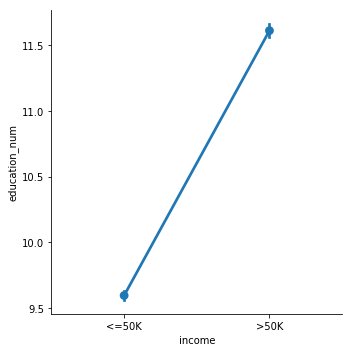

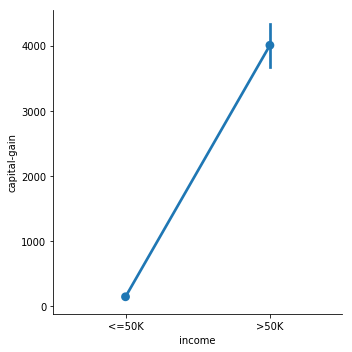

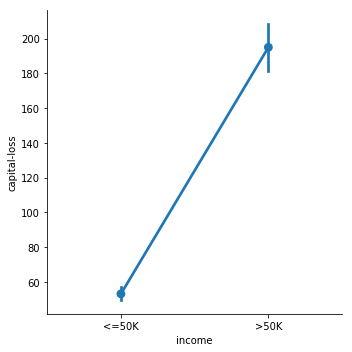

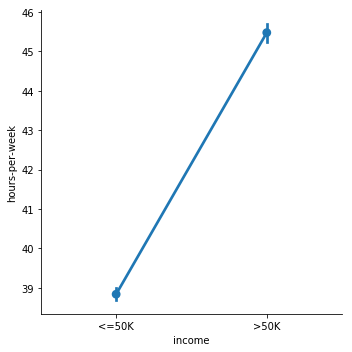

In [48]:
import seaborn as sns

plot_vars = ['education_num','capital-gain','capital-loss','hours-per-week']

# plot these factors 
for var in plot_vars:
    sns.factorplot('income', var,data = data )

cat_vars = ['marital-status','occupation','relationship','race','sex','native-country']
    
# for var in cat_vars:
for var in cat_vars:
    print(pd.crosstab(data['income'], data[var], normalize='columns'))

In [67]:
# visualization
def distribution(data, transformed = False):
    """
    Visualization code for displaying skewed distributions of features
    """
    
    # Create figure
    # Skewed feature plotting
    for i, feature in enumerate(['capital-gain','capital-loss', 'hours-per-week']):
        plt.hist(data[feature], bins = 25, color = 'blue')
        plt.title(feature)
        plt.show()

    
    
def evaluate(results):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = plt.subplots(2, 4, figsize = (11,7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000','#aaafff']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train',  'pred_time', 'acc_test', 'precision','recall']):
                # Creative plot code
                ax[j//3, j%3].bar(k*bar_width, results[learner][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("Time (in seconds)")
    ax[1, 0].set_ylabel("Accuracy Score")
    ax[1, 1].set_ylabel("Precision")
    ax[1, 2].set_ylabel("Recall")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("Model Testing")
    ax[1, 0].set_title("Accuracy Score on Testing Set")
    ax[1, 1].set_title("Precision on Test")
    ax[1, 2].set_title("Recall on Test")
        
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[1, 0].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Set additional plots invisibles
    ax[0, 3].set_visible(False)
    ax[1, 3].axis('off')

    # Create legend
    for i, learner in enumerate(results.keys()):
        plt.bar(0, 0, color=colors[i], label=learner)
    plt.legend()
    
    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    plt.tight_layout()
    plt.show()

    


In [68]:
# Summarizing the data, it looks like there's some larger vaues in captial-gain and capital-loss.
# We may need to normalize the data
# Income count has a 20% - 80% split between categories
# when we split by training and test, may not need to stratify data but we may want to check

def describeData(data):
    #     print(data.head())
    print(data.describe())
    print(data[['income']].agg(['count']))
    print(data.groupby(['income']).size())

describeData(data)



                age       mystery  education_num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  
       income
count   32561
income
<=50K    24720
>50K      784

In [81]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


def scale_data(feature):
    transformed_feature = feature 
    scaler = MinMaxScaler() # default scaling between 0 to 1
    numerical_var = ['age','education_num', 'capital-gain','capital-loss','hours-per-week']
    transformed_feature[numerical_var] = scaler.fit_transform(transformed_feature[numerical_var])
    return transformed_feature

 
# Data Encoder 
def getDummies(feature_data, field):
    dumdata = pd.get_dummies(feature_data[field])
    dum_fields = dumdata.columns
    for f in dum_fields:
        feature_data[f] = dumdata[f]
    feature_data = feature_data.drop(field, axis=1)
    return feature_data

def encodeBin(col, one_cat):
    encoded_col = col.apply(lambda x: 1 if x==one_cat  else 0)
    return encoded_col

def transform_data(feature):
    fields = ['age','education_num','capital-gain','capital-loss','hours-per-week','sex','race','workclass']
    transform_feature = feature[fields]
    transform_feature = scale_data(transform_feature)
    # fields to encode 
    transform_feature['sex'] = encodeBin(transform_feature['sex'],'Female')
    transform_feature = getDummies(transform_feature, 'race')
    transform_feature = getDummies(transform_feature, 'workclass')
    return transform_feature

    


In [82]:
# Scale the data with MinMaxScaler 
# and encode any variable we want to incldue 


label  = data['income']
feature = data.drop(['income'], axis=1)
transform_label = encodeBin(label, '>50K')
transform_data = transform_data(feature)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

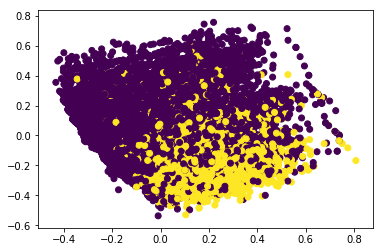

In [383]:
from sklearn.decomposition import PCA
# Visualize the PCA of dataset 

def visualizePCA(feature, label):
    pca = PCA(n_components = 2) # two primary principal compoennt 
    pca_fit = pca.fit_transform(feature)
    pca_fit_pd = pd.DataFrame(pca_fit)
    colors = ['blue','green']
    plt.scatter(pca_fit_pd[0],pca_fit_pd[1], c = label)
#     for val, l in zip(pca_fit,label):
#         plt.scatter(val[0],val[1], color = colors[l])
    plt.show()
    
    

    
# visual continuous variables with PCA,it  does seem like the category seems lineraly separable
visualizePCA(transform_data[['age','education_num','capital-gain',
                            'capital-loss','hours-per-week']], transform_label)
    

In [74]:
# Sample train and test dataset 
from sklearn.model_selection import train_test_split


# stratify the 
x_train, x_test, y_train, y_test = train_test_split(transform_data, transform_label, test_size = 0.2)


print('Training data:')
print('num lab, test: %f, %f:' % (len(x_train), len(y_train)))
print('num lab, test: %f, %f:' % (len(x_test), len(y_test)))
print('mean train, test perc: %f, %f:' % (np.mean(y_train), np.mean(y_test)))


print(x_train.head())

Training data:
num lab, test: 26048.000000, 26048.000000:
num lab, test: 6513.000000, 6513.000000:
mean train, test perc: 0.240172, 0.243359:
            age  education_num  capital-gain  capital-loss  hours-per-week  \
25794  0.219178       0.800000           0.0           0.0        0.397959   
27882  0.328767       0.600000           0.0           0.0        0.397959   
17983  0.219178       0.333333           0.0           0.0        0.346939   
17345  0.657534       0.666667           0.0           0.0        0.397959   
22830  0.342466       0.866667           0.0           0.0        0.397959   

       sex  Amer-Indian-Eskimo  Asian-Pac-Islander  Black  Other  White  ?  \
25794    1                   0                   0      0      0      1  0   
27882    1                   0                   0      1      0      0  0   
17983    0                   0                   0      0      0      1  0   
17345    1                   0                   0      0      0      1  0   

In [75]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from time import time

# How to evaluate model
# Accuracy, Recall, Precision 

def trainPredict(model, x_train, x_test, y_train, y_test):
    result = {}
    s0 = time()
    model.fit(x_train, y_train)
    s1 = time()
    y_pred_train = model.predict(x_train)
    s2 = time()
    # train the data 
    y_pred_test = model.predict(x_test)
    result['train_time']= (s1-s0)/1000
    result['acc_train'] = accuracy_score(y_train, y_pred_train)
    result['pred_time']= (s2-s1)/1000
    result['acc_test'] = accuracy_score(y_test, y_pred_test)
    result['precision'] = precision_score(y_test, y_pred_test)
    result['recall'] = recall_score(y_test, y_pred_test)
    return result



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


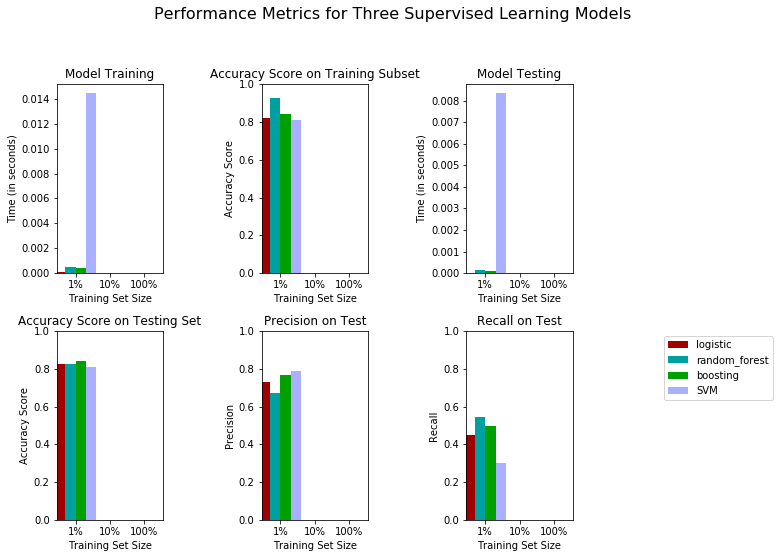

In [76]:
# initialize models 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC



result_by_model = {}
modelA = LogisticRegression()
modelB = RandomForestClassifier(n_estimators=30, max_features=5)
modelC = AdaBoostClassifier()
modelD = SVC()
result_by_model['logistic'] = trainPredict(modelA, x_train, x_test, y_train, y_test)
result_by_model['random_forest'] = trainPredict(modelB, x_train, x_test, y_train, y_test)
result_by_model['boosting'] = trainPredict(modelC, x_train, x_test, y_train, y_test)
result_by_model['SVM'] = trainPredict(modelD, x_train, x_test, y_train, y_test)


    
evaluate(result_by_model)

Based on above analysis, it seems like logistic model is the most efficient to use without significant loss to accuracy, precision or recall. However, overall boosting renders the highest accurcy on the dataset, and quite well on precision without having to addd to much time to inference.  Although, more parameter tuning may be useful, if the goal is to identify as many as recall as possible, 
